# Q5. Gale and Church (1993) sentence alignment on EUROPAL data

paper: http://web5.cs.columbia.edu/~julia/courses/old/cs4705-06/J93-1004.pdf 

The paper presents some emperical evidence to support their assumptions and decisions. For instance, they plot the correlation between the lengths of (aligned)paragraphs. The paragraph alignment process was crude, performed mostly by visual aids and verified manually. Since EUROPAL does not have paragraphs, i'll plot the correlation between aligned sentences from the EUROPAL test data - thus verifying that their hypothesis: longer sentences of one language should match with longer sentences of the other language, and vice-versa. 

## loading data and imports

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
import math

In [3]:
with open('../data/common-test/ep-test.en') as fp:
    el_lines = [line.strip() for line in fp]
    
with open('../data/common-test/ep-test.fr') as fp:
    fr_lines = [line.strip() for line in fp]
    
print len(el_lines), len(fr_lines)
print el_lines[:5]
print "-----"
print fr_lines[:5]

11369 11369
['resumption of the session', 'i declare resumed the session of the european parliament adjourned on thursday , 21 september 2000 .', 'approval of the minutes of the previous sitting', 'the minutes of the sitting on thursday , 21 september have been distributed .', 'are there any comments ?']
-----
['reprise de la session', 'je d\xe9clare reprise la session du parlement europ\xe9en , qui avait \xe9t\xe9 interrompue le jeudi 21 septembre 2000 .', 'approbation du proc\xe8s - verbal de la s\xe9ance pr\xe9c\xe9dente', 'le proc\xe8s - verbal de la s\xe9ance du jeudi 21 septembre vous a \xe9t\xe9 distribu\xe9 .', 'y a - t - il des observations ?']


## correlation between lengths of paragraphs

In [18]:
def find_chars(l):
    return len(l.replace(' ', ''))

def COMMENT(s):
    print "\n"+s+"\n"

In [9]:
[find_chars(l) for l in el_lines[:5]]

[22, 84, 40, 64, 20]


	
The sentence length appear to be correlated very well. In fact, cutting off the axes at say 400 would result
in a near perfect distribution of errors. The plot in the paper is a bit more sparse, considering that they were
plotting paragraph lengths and not individual sentences.




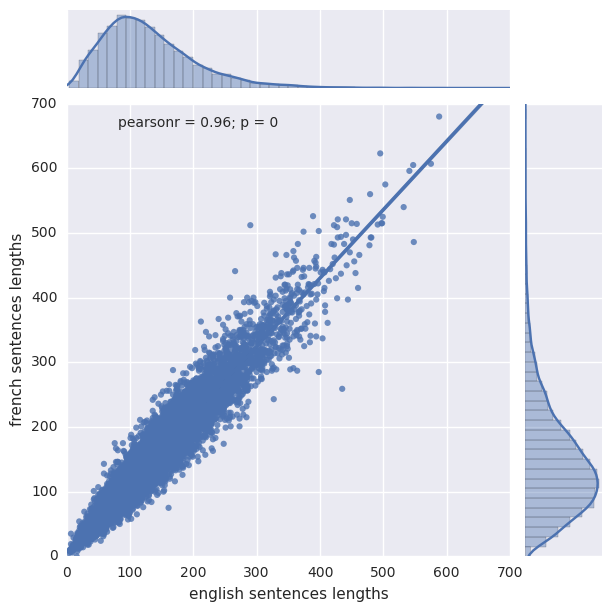

In [19]:
sns.jointplot(np.array([find_chars(l) for l in el_lines])
              , np.array([find_chars(l) for l in fr_lines]), kind="reg", xlim=(0, 700), ylim=(0, 700))
plt.xlabel("english sentences lengths")
plt.ylabel("french sentences lengths")

COMMENT("""
The sentence length appear to be correlated very well. In fact, cutting off the axes at say 400 would result
in a near perfect distribution of errors. The plot in the paper is a bit more sparse, considering that they were
plotting paragraph lengths and not individual sentences.
""")

In [29]:
para_ranges = itertools.izip(xrange(0, len(el_lines), 5), xrange(5, len(el_lines)+5, 5))
print map(find_chars, el_lines[:5]), sum(map(find_chars, el_lines[:5]))
para_el = [sum(map(find_chars, el_lines[i:j])) for i,j in para_ranges]
print para_el[0]

para_ranges = itertools.izip(xrange(0, len(el_lines), 5), xrange(5, len(el_lines)+5, 5))
print map(find_chars, fr_lines[:5]), sum(map(find_chars, fr_lines[:5]))
para_fr = [sum(map(find_chars, fr_lines[i:j])) for i,j in para_ranges]
print para_fr[0]

[22, 84, 40, 64, 20] 230
230
[18, 90, 46, 61, 23] 238
238



	
This is the regression plot for aligned paragraphs - assuming that every paragraph has 5 sentences.
Again, the correlation would be exactly the same - the previous plot will track against individual values while this
one tracks against the sum in groups of 5. Obviously they went with plotting the paragraph lengths, since they did
not have the aligned sentences in hand - which is the real problem that the paper is attempting to solve.




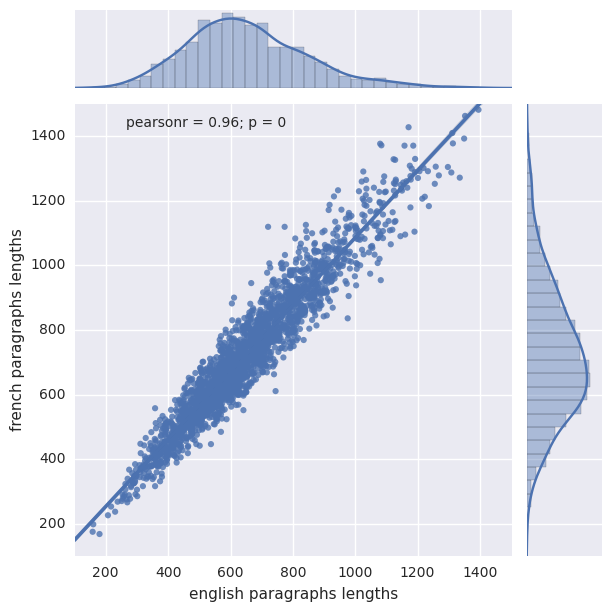

In [34]:
sns.jointplot(np.array(para_el), np.array(para_fr), xlim=(100, 1500), ylim=(100, 1500), kind="reg")
plt.xlabel("english paragraphs lengths")
plt.ylabel("french paragraphs lengths")
COMMENT("""
This is the regression plot for aligned paragraphs - assuming that every paragraph has 5 sentences.
Again, the correlation would be exactly the same - the previous plot will track against individual values while this
one tracks against the sum in groups of 5. Obviously they went with plotting the paragraph lengths, since they did
not have the aligned sentences in hand - which is the real problem that the paper is attempting to solve.
""")

## the distance measure

To quote from the paper: *"This distance measure is based on the assumption that each character in one language,
L1, gives rise to a random number of characters in the other language, L2. We
assume these random variables are independent and identically distributed with a
normal distribution. The model is then specified by the mean, c, and variance, s^2, of
this distribution: c is the expected number of characters in L2 per character in L1 and
s^2 is the variance of the number of characters in L2 per character in L1."*

The distance measure itself is an estimate of **-log(Prob(match | delta))**

**delta** is defined as (l2 -l1\*c)/(l1 \* s^2)

Note that while l1,l2 are for the texts/sentences under consideration for alignment, c and s are defined for the entire language.


	
Since c is the expected value of #L2 chars per L1 char, we could estimate c using maximum likelihood estimation. 
Given the aligned paragraphs, we can find the number of French characters that an English character can lead to. 
In a paragraph, this is just the number of French chars for every single English char. 
The log likelihood estimate of the joint probability distribution of every English char across the entire corpus
would be the mean value of the number of French chars per English char; i.e. sum(Fr chars per En char)/(Num En chars)


total Fr chars: 1650531
total En chars: 1485934
c estimate: 1.11077006112
c (smaller)estimate: 1.10495284516

	
The paper argues that c is not very langugage sensitive and proceeds with a estimate of ~1.
For the variance, the paper assumes it is propotional to the length and plots the correlation 
between the squared difference of paragraph lengths and the length of En paragraphs.


(12.475251884565756, 747.50046884769836, 0.19655154178052592, 

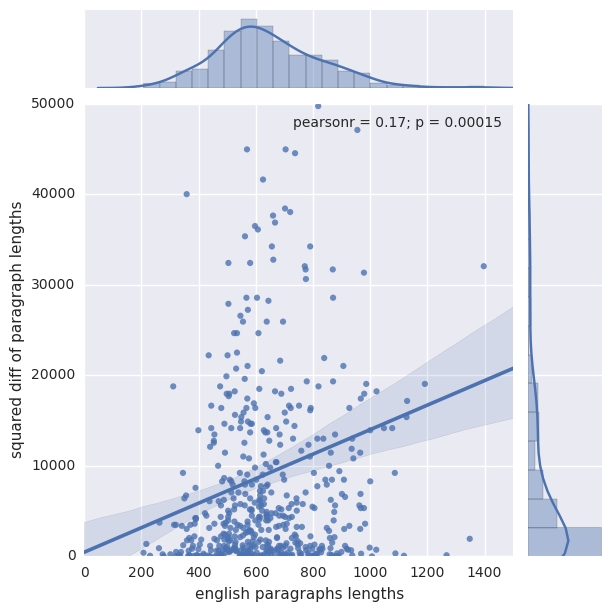

In [56]:
COMMENT("""
Since c is the expected value of #L2 chars per L1 char, we could estimate c using maximum likelihood estimation. 
Given the aligned paragraphs, we can find the number of French characters that an English character can lead to. 
In a paragraph, this is just the number of French chars for every single English char. 
The log likelihood estimate of the joint probability distribution of every English char across the entire corpus
would be the mean value of the number of French chars per English char; i.e. sum(Fr chars per En char)/(Num En chars)
""")

print "total Fr chars:", sum(para_fr)
print "total En chars:", sum(para_el)
print "c estimate:", sum(para_fr)*1.0/sum(para_el)
print "c (smaller)estimate:", sum(para_fr[:250])*1.0/sum(para_el[:250])

COMMENT("""
The paper argues that c is not very langugage sensitive and proceeds with a estimate of ~1.
For the variance, the paper assumes it is propotional to the length and plots the correlation 
between the squared difference of paragraph lengths and the length of En paragraphs.
""")

sns.jointplot(np.array(para_el[:500]), np.array([(para_fr[i]-para_el[i])**2 for i in range(len(para_fr[:500]))]), 
              kind="reg", xlim=(0, 1500), ylim=(0, 50000))
plt.xlabel("english paragraphs lengths")
plt.ylabel("squared diff of paragraph lengths")

print stats.linregress(para_el, [(para_fr[i]-para_el[i])**2 for i in range(len(para_fr))])

## interpreting delta

Now that we have estimated c and s^2 for our corpus, we can estimate the delta for every language pair.

In [120]:
def get_delta((l1, l2), c=1.1, s_2=12.5):
    return (find_chars(l2) - find_chars(l1)*c)*1.0/math.sqrt(find_chars(l1)*s_2)

In [121]:
deltas = map(get_delta, itertools.izip(el_lines, fr_lines))


	
As proposed, the delta follows a near normal distribution - but the deviation is not 1. The paper however, 
dismisses these differences.

mu: 0.0560709125099
deviation: 0.526087737666


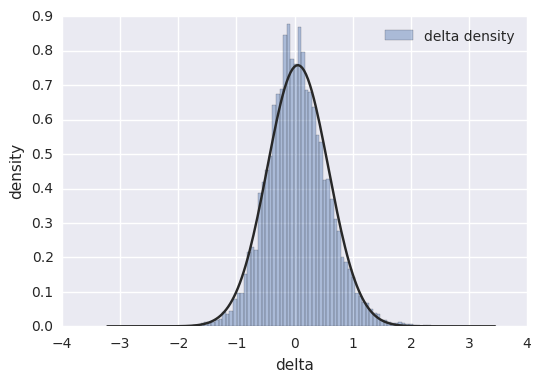

In [124]:
sns.distplot(np.array(deltas), bins=100, norm_hist=True, label="delta density", kde=False, fit=stats.norm)
mu, std = stats.norm.fit(deltas)
plt.legend(loc="upper right")
plt.xlabel("delta")
plt.ylabel("density")

COMMENT("""
As proposed, the delta follows a near normal distribution - but the deviation is not 1. The paper however, 
dismisses these differences.""")
print "mu:", mu
print "deviation:", std

## calculating p(match | delta) using bayes rule

In [126]:
COMMENT("""STOPPED HERE!!! SINCE THE (MATCH)PRIOR REQUIRED IN THE BAYES RULE IS CALCULATED BY HAND 

FOR EVERY TYPE OF MATCH: 1-1, 1-0, 1-2, 2-2""")


	STOPPED HERE!!! SINCE THE (MATCH)PRIOR REQUIRED IN THE BAYES RULE IS CALCULATED BY HAND 

FOR EVERY TYPE OF MATCH: 1-1, 1-0, 1-2, 2-2

